In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Function to convert an array into a column vector. The input x is a list or a row vector.
def col(x):
    return np.array(np.matrix(x)).T

# Climate Change

Climate change has been debated for years, and a central piece of the debate has been its cause: is it due to the natural cycle of the system, or is it due to human activity? You can find attached the report on climate change published in 2007 (*ar4_syr.pdf*) if you want to better understand the context of this issue.

Attached you can find the following real data:
- *SunRad.txt*: **Monthly solar radiation** (kWh/m^2/day) in the city of Columbus, Ohio, USA (period: 1961-1990).
- *Temp_CO2.txt*: **Annual temperature anomalies** (°C). These anomalies are calculated as the difference between the observed temperature and the temperature estimated by a model (period: 1961-1990). Annual concentration of CO2 (ppm) measured at Mauna Loa Observatory, Hawaii (period: 1961-1990).

We aim to answer the question posed initially using this data, maximum likelihood estimation and the EM algorithm.

### a) We first convert the solar radiation data to an annual average

In [2]:
# Exporting data from .txt. First, remove the first row (strings).
with open('Sun_Rad.txt') as f:
    lines = (line for line in f if not line.startswith('"'))
    srad = np.loadtxt(lines, skiprows=0)

# Extracting data from each column
year = srad[:, 0]
month = srad[:, 1]
sun_rad = srad[:, 2]

# List to store values for each month
yr = []
# List to store the average for each year
avgs = []

# Creating a list with data for the 12 months of each year and adding that list to a list that stores lists for all the years.
for i in range(0, len(sun_rad), 12):
    yr.append(list(sun_rad[i:i+12]))

# Calculating the average for each list (year) within the list of lists.
for lst in yr:
    avgs.append(np.round(np.average(lst), 3))

averages = pd.DataFrame(avgs, index=list(set([int(i) for i in year])), columns=["Annual Average"])
averages


,Annual Average
61,4.083
62,4.125
63,4.567
64,4.408
65,4.325
66,4.200
67,4.183
68,4.317
69,4.217
70,4.233


### b) We plot each of the three signals against time.

In [3]:
# Exporting data from the .txt file of temperature and CO2. First, remove the first row (strings).
with open('Temp_CO2.txt') as f:
    lines = (line for line in f if not line.startswith('"'))
    temp_CO2 = np.loadtxt(lines, skiprows=0)

# Separating temperature and CO2 concentration data.
temp = temp_CO2[:, 1]
co2 = temp_CO2[:, 2]

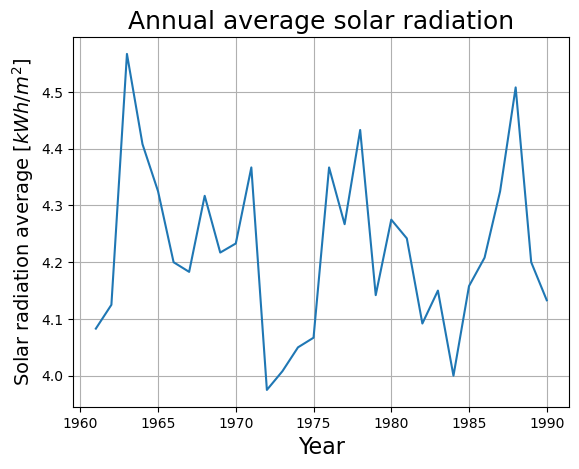

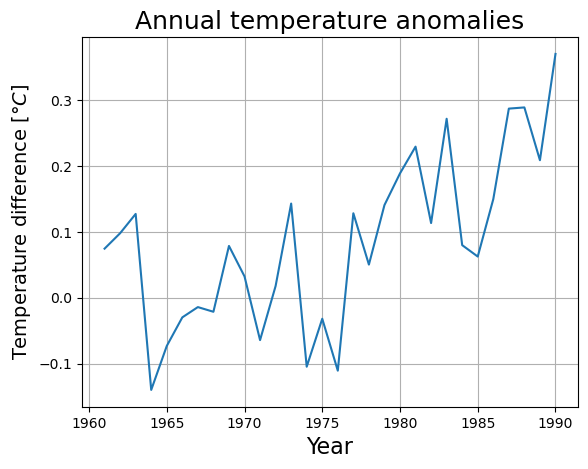

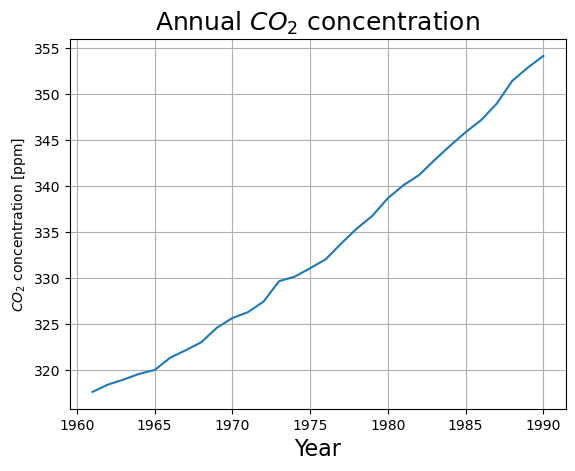

In [4]:
# List with the years to consider
years = [*range(1961, 1991, 1)]

plt.plot(years, averages)
plt.grid()
plt.title(r'Annual average solar radiation', fontsize=18)
plt.xlabel(r'Year', fontsize=16)
plt.ylabel(r'Solar radiation average $[kWh/m^2]$', fontsize=14)
plt.show()

plt.figure()
plt.plot(years, temp)
plt.grid()
plt.title(r'Annual temperature anomalies', fontsize=18)
plt.xlabel(r'Year', fontsize=16)
plt.ylabel(r'Temperature difference $[°C]$', fontsize=14)
plt.show()

plt.figure()
plt.plot(years, co2)
plt.grid()
plt.title(r'Annual $CO_2$ concentration', fontsize=18)
plt.xlabel(r'Year', fontsize=16)
plt.ylabel(r'$CO_2$ concentration [ppm]')
plt.show()


#### Observations

From the plot of the annual average solar radiation, it can be noted that the data is highly scattered and there doesn't seem to be a clear dependence between solar radiation and the passage of time. The average solar radiation ranges between $3.9 kWh/m^2$ and $4.6 kWh/m^2$.

The plot of annual temperature anomalies shows a behavior without a very clear trend, as there were different temperature differences for different years. However, it can be noted that the highest temperature difference values occurred for the later years, that is, for the 1980s onwards.

The plot of $\text{CO}_2$ concentration shows a clear direct relationship between time and the concentration of the compound: as the years progress, the concentration of $\text{CO}_2$ increases almost linearly.


### c) Plot of temperature vs solar radiation, and plot of temperature vs CO2 concentration.

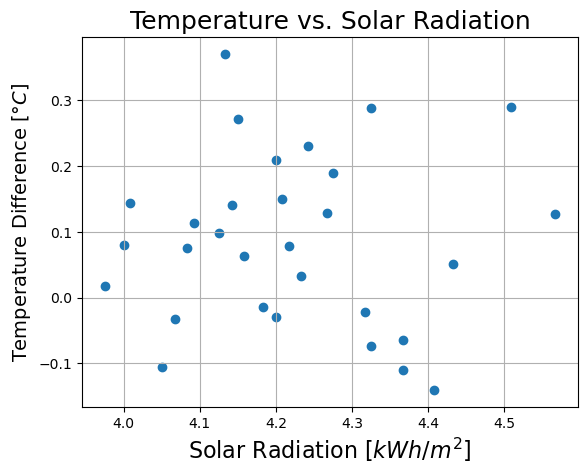

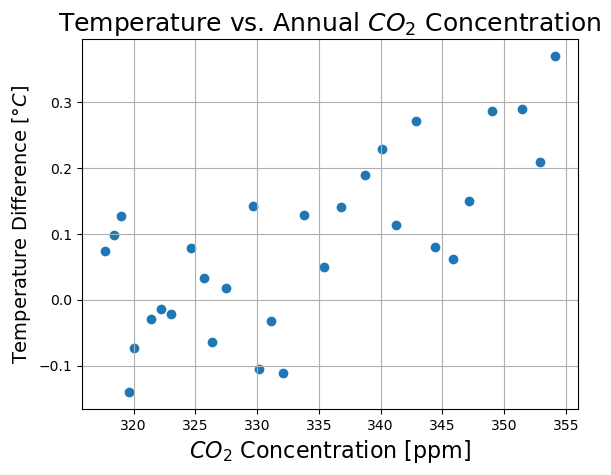

In [5]:
plt.scatter(avgs, temp)
plt.grid()
plt.title(r'Temperature vs. Solar Radiation', fontsize=18)
plt.xlabel(r'Solar Radiation $[kWh/m^2]$', fontsize=16)
plt.ylabel(r'Temperature Difference $[°C]$', fontsize=14)
plt.show()

plt.figure()
plt.scatter(co2, temp)
plt.grid()
plt.title(r'Temperature vs. Annual $CO_2$ Concentration', fontsize=18)
plt.xlabel(r'$CO_2$ Concentration [ppm]', fontsize=16)
plt.ylabel(r'Temperature Difference $[°C]$', fontsize=14)
plt.show()

### d) Using the ML (maximum likelihood) estimation of the covariance matrix, we estimate the correlation coefficient between the variable pairs: (temperature, solar radiation), and (temperature, CO2 concentration).

Recall that an estimator of the covariance matrix is given by the equation
#### $$\hat{Q} = \frac{1}{M-1}\sum_{i=1}^{M}(x_i - \mu)(x_i - \mu)^T$$
where $x, \mu \in \mathbb{R}^n$ and $\mu$ is the estimation of the vector of expected values given by the equation
#### $$\mu = \frac{1}{M}\sum_{i=1}^{M}x_i$$


In [6]:
# First, we estimate Q and mu for the temperature, solar radiation pair.

# Create vectors of the form v = [T, R]^T where T is temperature and R is solar radiation. We will place them in a 2x30 matrix TR.
TR = np.zeros((2, len(avgs)))
n, m = np.shape(TR)

# Fill the matrix
for i in range(m):
    TR[0, i] = temp[i]
    TR[1, i] = avgs[i]

# Create the mean estimation mu
mu_TR = np.zeros((2,1))
for i in range(m):
    mu_TR = mu_TR + col(TR[:, i])
mu_TR = mu_TR/m
print(f'Mean estimation mu_TR: \n {mu_TR}\n')

# Create the covariance matrix estimation
Q_TR = np.zeros((2,2))
for i in range(m):
    Q_TR = Q_TR + (col(TR[:,i])-mu_TR)@(col(TR[:,i])-mu_TR).T
Q_TR = Q_TR/(m-1)
print(f'Covariance matrix estimation Q_TR: \n {Q_TR}\n')

# Calculate the correlation coefficient between the variables
p_TR = (Q_TR[0,1])/(np.sqrt(Q_TR[0,0]*Q_TR[1,1]))
print(f'Correlation coefficient between temperature and solar radiation: \n p_TR = {np.round(p_TR, 4)}')


Mean estimation mu_TR: 
 [[0.08499   ]
 [4.22083333]]

Covariance matrix estimation Q_TR: 
 [[ 0.01689071 -0.0002945 ]
 [-0.0002945   0.02204083]]

Correlation coefficient between temperature and solar radiation: 
 p_TR = -0.0153


In [7]:
# Now we estimate Q and mu for the temperature, CO2 concentration pair.

# Create vectors of the form v = [T, C]^T where T is temperature and C is CO2 concentration. We will place them in a 2x30 matrix TC.
TC = np.zeros((2, len(temp)))
n1, m1 = np.shape(TC)

# Fill the matrix
for i in range(m1):
    TC[0, i] = temp[i]
    TC[1, i] = co2[i]

# Create the mean estimation mu
mu_TC = np.zeros((2,1))
for i in range(m1):
    mu_TC = mu_TC + col(TC[:, i])
mu_TC = mu_TC/m1
print(f'Mean estimation mu_TC: \n {mu_TC}\n')

# Create the covariance matrix estimation
Q_TC = np.zeros((2,2))
for i in range(m1):
    Q_TC = Q_TC + (col(TC[:,i])-mu_TC)@(col(TC[:,i])-mu_TC).T
Q_TC = Q_TC/(m1-1)
print(f'Covariance matrix estimation Q_TC: \n {Q_TC}\n')

# Calculate the correlation coefficient between the variables
p_TC = (Q_TC[0,1])/(np.sqrt(Q_TC[0,0]*Q_TC[1,1]))
print(f'Correlation coefficient between temperature and CO2 concentration: \n p_TC = {np.round(p_TC, 4)}')


Mean estimation mu_TC: 
 [[8.49900000e-02]
 [3.33405667e+02]]

Covariance matrix estimation Q_TC: 
 [[1.68907127e-02 1.04706723e+00]
 [1.04706723e+00 1.29799963e+02]]

Correlation coefficient between temperature and CO2 concentration: 
 p_TC = 0.7072


#### Observations

From the pair (temperature difference, solar radiation), it is clear from the correlation coefficient between these two variables that they are practically uncorrelated, as the value is very close to zero. This reaffirms the result obtained in the graph between these two variables, where no type of relationship between the variables was seen.

From the pair (temperature difference, CO2 concentration), it is clear from the correlation coefficient between these two variables that they are positively correlated variables, as the correlation coefficient obtained is a value close to 1 and positive, indicating that there is a directly proportional relationship between the variables, which reaffirms what could be observed from the graph presented in the previous section.


### e) Starting from the first 10 years and ending at the last 10 years, we slide a 10-year window and estimate the correlation coefficient of the pairs (temperature, solar radiation), and (temperature, CO2 concentration) for each window. As a result, we obtain two correlation signals with 20 points each, and we plot them against time.

In [8]:
# Create a list with the years.
years = list(set([int(i) for i in year]))

# Create lists to store the different vectors corresponding to each window.
year_windows = []
temp_windows = []
srad_windows = []
co2_windows = []

# Fill each list with the corresponding windows.
for i in range(21):
    year_windows.append(years[i:10+i])
    temp_windows.append(temp[i:10+i])
    srad_windows.append(avgs[i:10+i])
    co2_windows.append(co2[i:10+i])


#### First, we perform the process for the pair **(temperature, solar radiation)**

In [9]:
# For each of the windows, we calculate estimated mean, estimated covariance matrix, and correlation coefficient.
k = 1  # Window counter
ps_TR = []  # List of T-R correlation coefficients

for i in range(len(temp_windows)):

    T = temp_windows[i]
    R = srad_windows[i]

    # Create vectors of the form v = [T, R]^T where T is temperature and R is solar radiation. We will place them in a 2x10 matrix TR_window.
    TR_window = np.zeros((2, len(T)))
    f, c = np.shape(TR_window)

    # Fill the matrix
    for j in range(c):
        TR_window[0, j] = T[j]
        TR_window[1, j] = R[j]

    # Create the mean estimation
    mean_estimation = np.zeros((2,1))
    for j in range(c):
        mean_estimation = mean_estimation + col(TR_window[:, j])
    mean_estimation = mean_estimation/c
    print(f'\nMean estimation mean_estimation: \n {mean_estimation}\n')

    # Create the covariance matrix estimation
    covariance_estimation = np.zeros((2,2))
    for j in range(c):
        covariance_estimation = covariance_estimation + (col(TR_window[:,j])-mean_estimation)@(col(TR_window[:,j])-mean_estimation).T
    covariance_estimation = covariance_estimation/(c-1)
    print(f'Covariance matrix estimation covariance_estimation: \n {covariance_estimation}\n')

    # Calculate the correlation coefficient between the variables
    p_window = (covariance_estimation[0,1])/(np.sqrt(covariance_estimation[0,0]*covariance_estimation[1,1]))
    print(f'Correlation coefficient between temperature and solar radiation (window {k}): \n p_window = {np.round(p_window, 4)}\n')
    print('-----------------------------------------')
    ps_TR.append(np.round(p_window, 4))

    k += 1



Mean estimation mean_estimation: 
 [[0.01322]
 [4.2658 ]]

Covariance matrix estimation covariance_estimation: 
 [[ 0.0070298  -0.00179665]
 [-0.00179665  0.02055018]]

Correlation coefficient between temperature and solar radiation (window 1): 
 p_window = -0.1495

-----------------------------------------

Mean estimation mean_estimation: 
 [[-6.6000e-04]
 [ 4.2942e+00]]

Covariance matrix estimation covariance_estimation: 
 [[ 0.00706619 -0.00098566]
 [-0.00098566  0.01707907]]

Correlation coefficient between temperature and solar radiation (window 2): 
 p_window = -0.0897

-----------------------------------------

Mean estimation mean_estimation: 
 [[-0.00867]
 [ 4.2792 ]]

Covariance matrix estimation covariance_estimation: 
 [[5.95342456e-03 7.90488889e-05]
 [7.90488889e-05 2.49690667e-02]]

Correlation coefficient between temperature and solar radiation (window 3): 
 p_window = 0.0065

-----------------------------------------

Mean estimation mean_estimation: 
 [[-0.0071]
 [

#### Now, we perform the process for the pair **(temperature, CO2 concentration)**

In [10]:
# For each of the windows, we calculate estimated mean, estimated covariance matrix, and correlation coefficient.
k = 1  # Window counter
ps_TC = []  # List of T-C correlation coefficients
for i in range(len(temp_windows)):

    T = temp_windows[i]
    C = co2_windows[i]

    # Create vectors of the form v = [T, C]^T where T is temperature and C is CO2 concentration. We will place them in a 2x10 matrix TC_window.
    TC_window = np.zeros((2, len(T)))
    f, c = np.shape(TC_window)

    # Fill the matrix
    for j in range(c):
        TC_window[0, j] = T[j]
        TC_window[1, j] = C[j]

    # Create the mean estimation
    mean_estimation = np.zeros((2,1))
    for j in range(c):
        mean_estimation = mean_estimation + col(TC_window[:, j])
    mean_estimation = mean_estimation/c
    print(f'\nMean estimation mean_estimation: \n {mean_estimation}\n')

    # Create the covariance matrix estimation
    covariance_estimation = np.zeros((2,2))
    for j in range(c):
        covariance_estimation = covariance_estimation + (col(TC_window[:,j])-mean_estimation)@(col(TC_window[:,j])-mean_estimation).T
    covariance_estimation = covariance_estimation/(c-1)
    print(f'Covariance matrix estimation covariance_estimation: \n {covariance_estimation}\n')

    # Calculate the correlation coefficient between the variables
    p_window = (covariance_estimation[0,1])/(np.sqrt(covariance_estimation[0,0]*covariance_estimation[1,1]))
    print(f'Correlation coefficient between temperature and CO2 concentration (window {k}): \n p_window = {np.round(p_window, 4)}\n')
    print('-----------------------------------------')
    ps_TC.append(np.round(p_window, 4))

    k += 1



Mean estimation mean_estimation: 
 [[1.32200e-02]
 [3.21163e+02]]

Covariance matrix estimation covariance_estimation: 
 [[ 7.02979511e-03 -1.62509556e-02]
 [-1.62509556e-02  7.23455667e+00]]

Correlation coefficient between temperature and CO2 concentration (window 1): 
 p_window = -0.0721

-----------------------------------------

Mean estimation mean_estimation: 
 [[-6.6000e-04]
 [ 3.2203e+02]]

Covariance matrix estimation covariance_estimation: 
 [[ 7.06619156e-03 -2.33792222e-02]
 [-2.33792222e-02  7.98306667e+00]]

Correlation coefficient between temperature and CO2 concentration (window 2): 
 p_window = -0.0984

-----------------------------------------

Mean estimation mean_estimation: 
 [[-8.67000e-03]
 [ 3.22931e+02]]

Covariance matrix estimation covariance_estimation: 
 [[5.95342456e-03 3.49821889e-02]
 [3.49821889e-02 8.93312111e+00]]

Correlation coefficient between temperature and CO2 concentration (window 3): 
 p_window = 0.1517

-------------------------------------

In [11]:
# Display a table showing the years included in each of the windows
windows = [*range(1, 22)]
window_years = pd.DataFrame(year_windows, index=[f'Window {i}' for i in windows], columns=[f'Year {i}' for i in range(1,11)])
window_years

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Window 1,61,62,63,64,65,66,67,68,69,70
Window 2,62,63,64,65,66,67,68,69,70,71
Window 3,63,64,65,66,67,68,69,70,71,72
Window 4,64,65,66,67,68,69,70,71,72,73
Window 5,65,66,67,68,69,70,71,72,73,74
Window 6,66,67,68,69,70,71,72,73,74,75
Window 7,67,68,69,70,71,72,73,74,75,76
Window 8,68,69,70,71,72,73,74,75,76,77
Window 9,69,70,71,72,73,74,75,76,77,78
Window 10,70,71,72,73,74,75,76,77,78,79


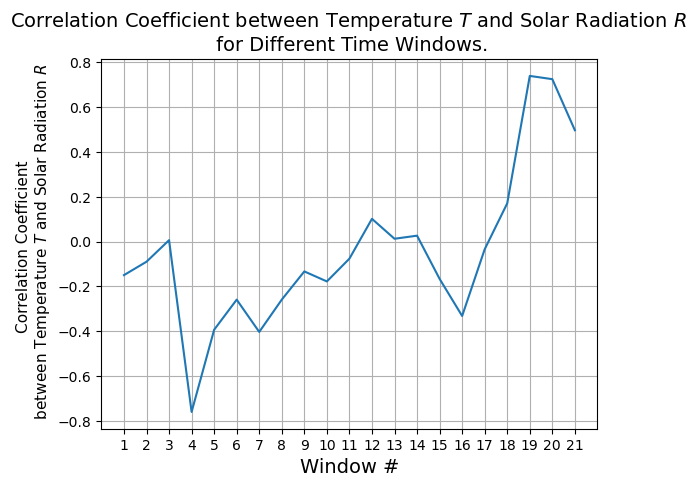

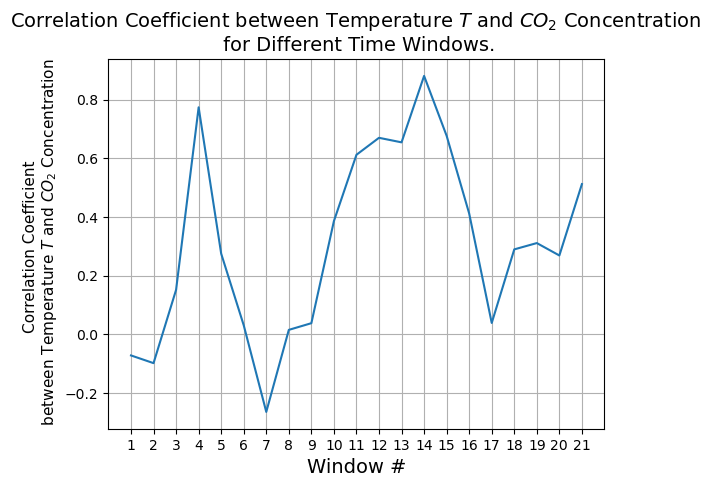

In [12]:
plt.plot(windows, ps_TR)
xticks = plt.xticks(np.arange(1, 22))
plt.grid()
plt.title('Correlation Coefficient between Temperature $T$ and Solar Radiation $R$ \n for Different Time Windows.', fontsize=14)
plt.xlabel('Window #', fontsize=14)
plt.ylabel('Correlation Coefficient \n between Temperature $T$ and Solar Radiation $R$', fontsize=11)
plt.show()

plt.figure()
plt.plot(windows, ps_TC)
xticks = plt.xticks(np.arange(1, 22))
plt.grid()
plt.title('Correlation Coefficient between Temperature $T$ and $CO_2$ Concentration \n for Different Time Windows.', fontsize=14)
plt.xlabel('Window #', fontsize=14)
plt.ylabel('Correlation Coefficient \n between Temperature $T$ and $CO_2$ Concentration', fontsize=11)
plt.show()


### f) Based on each of the results obtained in a) - e), it can be said that:


Taking into account that the comparison of variables **(temperature, solar radiation)** provides information on how the planet's temperature changes depending on a natural process such as solar radiation, and that the comparison of variables **(temperature, CO2 concentration)** provides information on how the planet's temperature changes depending on human intervention in the form of carbon dioxide emissions, it can be asserted based on the previously obtained data that **it is clear that climate change is due to human activity and not to the natural cycle of the system.**

This assertion can be made primarily because for all the years analyzed, a correlation coefficient between temperature and solar radiation very close to zero was found, and when the time window was shifted by 10 years, inconsistent results were obtained, showing negative correlation for some, zero for others, and positive for others. Meanwhile, when the correlation between temperature and CO2 concentration variables was observed, it was found that there is a directly proportional relationship between the variables, given by the positive correlation coefficient, both for the 30 years analyzed initially and for the 10-year window displacement. In fact, in the latter graph, it is clear that for most of the time windows used, a positive correlation coefficient was obtained, which supports the graph found in section c), where a directly proportional relationship between the variables was seen.
